In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
#DATA IMPORT

In [7]:
df = pd.read_csv('sample_data.csv')

In [ ]:
#DATASET INFO

In [8]:
df.shape

(10000, 8)

In [9]:
df.head()

,cl_id,successful,paid_amount,co_name,datecl,payment_method,mid,card_brand
0,5120,0,2000.08,Canada,2/27/2021,Mobile,106,JBC
1,8318,1,4446.48,Germany,1/19/2021,Bank transfers,266,Amex
2,9663,1,1862.80,United States,2/5/2021,E-Wallet,75,Visa
3,1812,0,4403.84,Iran,2/21/2021,E-Wallet,140,MasterCard
4,9726,0,4652.16,Germany,2/27/2021,Bank transfers,52,Visa


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cl_id           10000 non-null  int64  
 1   successful      10000 non-null  int64  
 2   paid_amount     10000 non-null  float64
 3   co_name         10000 non-null  object 
 4   datecl          10000 non-null  object 
 5   payment_method  10000 non-null  object 
 6   mid             10000 non-null  int64  
 7   card_brand      10000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


In [11]:
df.dtypes

cl_id               int64
successful          int64
paid_amount       float64
co_name            object
datecl             object
payment_method     object
mid                 int64
card_brand         object
dtype: object

In [ ]:
#SET CORRECT DATATYPES

In [22]:
df['successful'] = df['successful'].astype(bool)
df['datecl'] = pd.to_datetime(df['datecl'])

In [24]:
df.dtypes

cl_id                      int64
successful                  bool
paid_amount              float64
co_name                   object
datecl            datetime64[ns]
payment_method            object
mid                        int64
card_brand                object
dtype: object

In [128]:
df.head()

,cl_id,successful,paid_amount,co_name,datecl,payment_method,mid,card_brand
0,5120,False,2000.08,Canada,2021-02-27,Mobile,106,JBC
1,8318,True,4446.48,Germany,2021-01-19,Bank transfers,266,Amex
2,9663,True,1862.80,United States,2021-02-05,E-Wallet,75,Visa
3,1812,False,4403.84,Iran,2021-02-21,E-Wallet,140,MasterCard
4,9726,False,4652.16,Germany,2021-02-27,Bank transfers,52,Visa


In [ ]:
#CHECK MISSING VALUES

In [15]:
df.isna().sum()

cl_id             0
successful        0
paid_amount       0
co_name           0
datecl            0
payment_method    0
mid               0
card_brand        0
dtype: int64

There are no missing values in the dataset

In [ ]:
#CHECK DUPLICATED VALUES

In [16]:
df.duplicated().sum()

0

There are no dulicated values in the dataset

In [ ]:
#QUESTION 1: Visualize daily trends of the traffic for the period: total number of clicks, successful payments and total paid amount.

In [60]:
clicks_by_date = df.groupby('datecl').agg({'cl_id' : 'nunique'}).reset_index() #GROUP CLICKS BY DATE
clicks_by_date.head()

,datecl,cl_id
0,2021-01-01,105
1,2021-01-02,111
2,2021-01-03,105
3,2021-01-04,118
4,2021-01-05,104


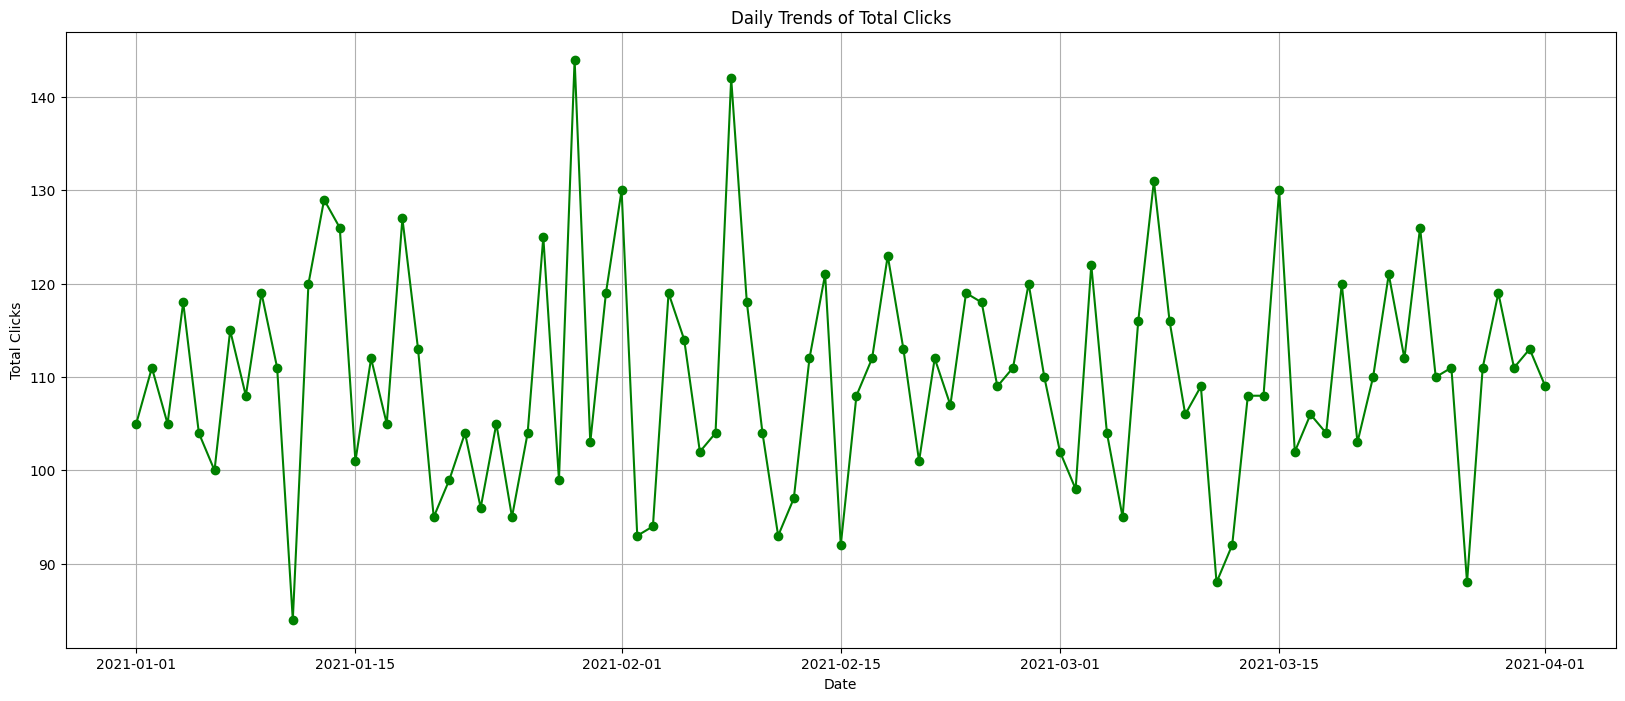

In [87]:
# PlOTTING
plt.figure(figsize=(20, 8))
plt.plot(clicks_by_date['datecl'], clicks_by_date['cl_id'], marker='o', color ='g')
plt.title('Daily Trends of Total Clicks')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.grid(True)
plt.show()

In [43]:
successful_df = df[df['successful']] #CREATE NEW DATAFRAME WITH SUCCESSFUL PAYMENTS
successful_df.head()

,cl_id,successful,paid_amount,co_name,datecl,payment_method,mid,card_brand
1,8318,True,4446.48,Germany,2021-01-19,Bank transfers,266,Amex
2,9663,True,1862.80,United States,2021-02-05,E-Wallet,75,Visa
7,7336,True,2102.56,Finland,2021-03-21,Credit cards,39,JBC
9,3729,True,1824.76,Canada,2021-01-28,Mobile,282,Visa
12,5993,True,4968.88,Finland,2021-01-31,Credit cards,185,JBC


In [59]:
successful_payments_by_date = successful_df.groupby('datecl').agg({'successful' : 'count'}).reset_index() #GROUP SUCCESSFUL PAYMENTS BY DATE
successful_payments_by_date.head()

,datecl,successful
0,2021-01-01,54
1,2021-01-02,48
2,2021-01-03,45
3,2021-01-04,62
4,2021-01-05,47


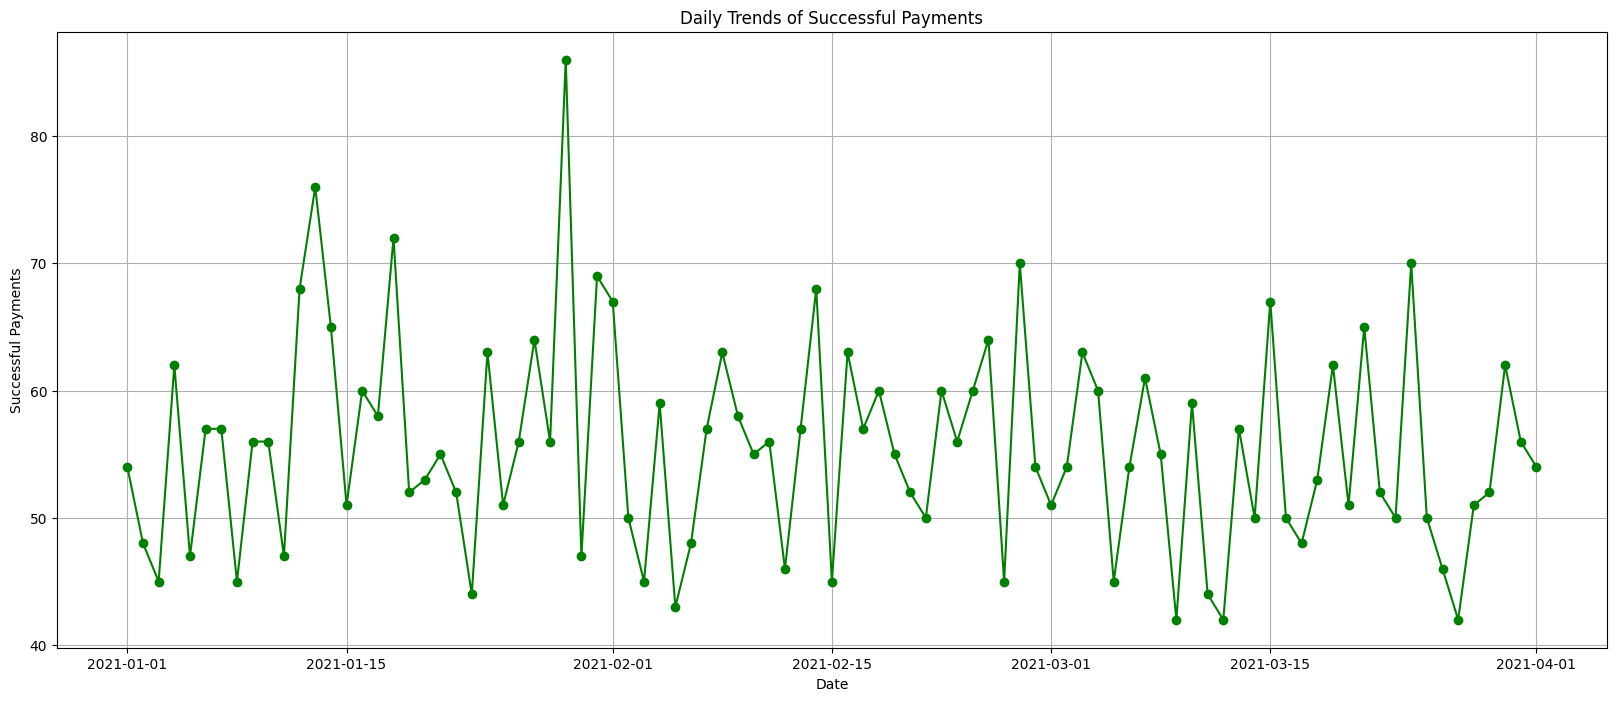

In [89]:
# PLOTTING
plt.figure(figsize=(20, 8))
plt.plot(successful_payments_by_date['datecl'], successful_payments_by_date['successful'], marker='o', color ='g')
plt.title('Daily Trends of Successful Payments')
plt.xlabel('Date')
plt.ylabel('Successful Payments')
plt.grid(True)
plt.show()

In [57]:
paid_amount_by_date = successful_df.groupby('datecl').agg({'paid_amount' : 'sum'}).reset_index() #GROUP PAID AMOUNT BY DATE
paid_amount_by_date.head()

,datecl,paid_amount
0,2021-01-01,167415.80
1,2021-01-02,133813.28
2,2021-01-03,136665.72
3,2021-01-04,175142.56
4,2021-01-05,149306.56


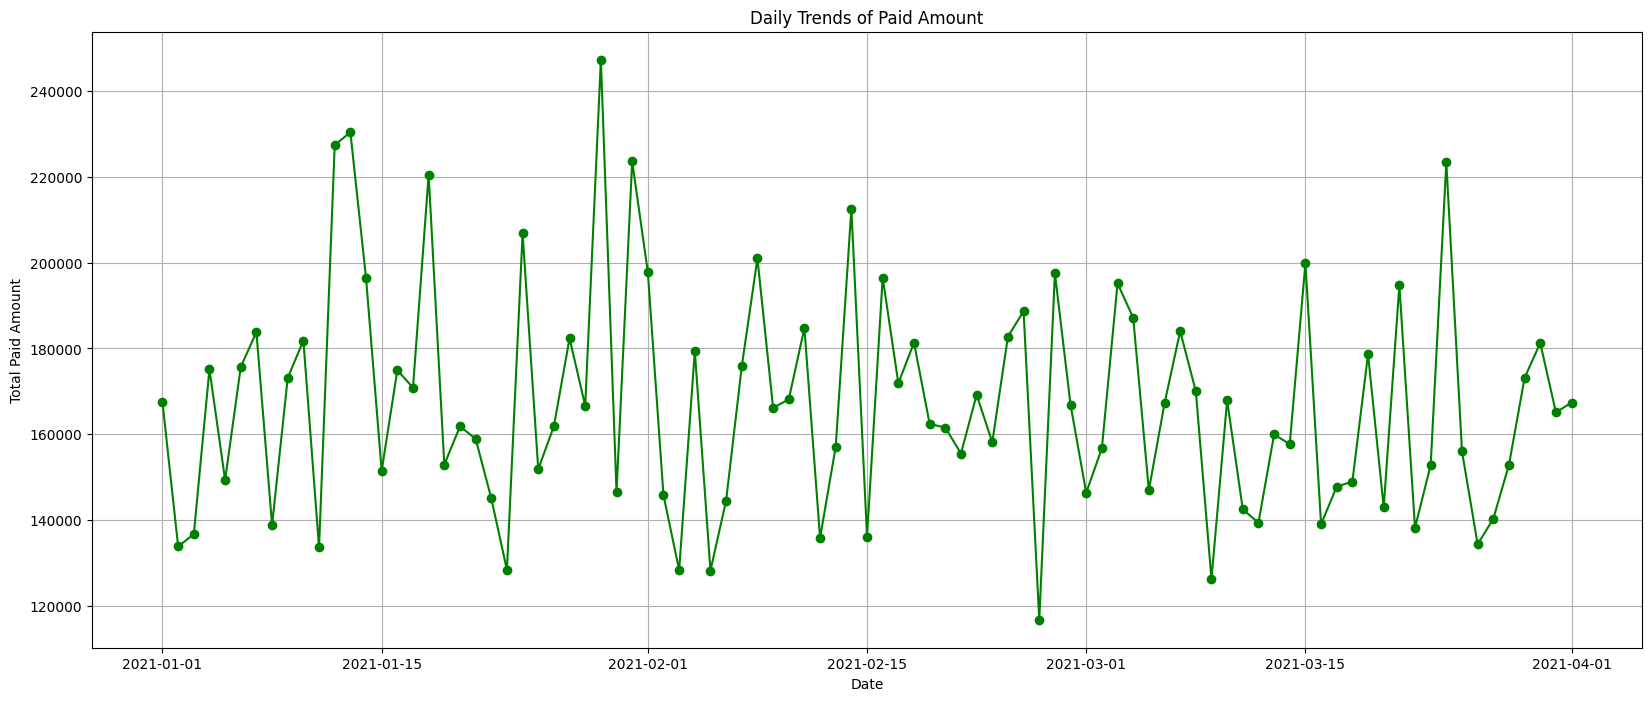

In [83]:
# PLOTTING
plt.figure(figsize=(20, 8))
plt.plot(paid_amount_by_date['datecl'], paid_amount_by_date['paid_amount'], marker='o', color ='g')
plt.title('Daily Trends of Paid Amount')
plt.xlabel('Date')
plt.ylabel('Total Paid Amount')
plt.grid(True)
plt.show()

In [ ]:
#QUESTION 2: Who were the top 10 merchants in terms of paid amount? What are merchants’ contributions to the total paid amount overtime? Visualize their daily traffic and comment on their performance.

In [110]:
paid_amount_by_merchants = successful_df.groupby('mid')['paid_amount'].sum() #GET TOP 10 MERCHANTS BY PAID AMOUNT
top_10_merchants = paid_amount_by_merchants.nlargest(10)
top_10_merchants

mid
257    101363.28
216     95652.28
289     94224.72
35      83890.56
278     81417.80
73      80321.28
111     79944.08
17      79484.28
171     79434.88
54      79034.88
Name: paid_amount, dtype: float64

In [111]:
filtered_df = successful_df[successful_df['mid'].isin(top_10_merchants.index)] #CREATE NEW DATAFRAME WITH TOP 10 MERCHANTS
filtered_df.head()

,cl_id,successful,paid_amount,co_name,datecl,payment_method,mid,card_brand
62,1112,True,2034.52,Turkey,2021-02-04,Credit cards,289,MasterCard
65,8001,True,2579.28,Norway,2021-01-12,Credit cards,111,MasterCard
156,3547,True,3036.48,Australia,2021-01-17,Prepaid cards,111,MasterCard
174,6118,True,3191.28,Denmark,2021-02-13,Prepaid cards,54,MasterCard
256,3118,True,2745.88,Finland,2021-02-17,Bank transfers,111,MasterCard


In [112]:
merchant_contributions = filtered_df.groupby(['mid', 'datecl'])['paid_amount'].sum().reset_index() #GROUP PAID AMOUNT BY MERCHANTS AND DATE
merchant_contributions.head()

,mid,datecl,paid_amount
0,17,2021-01-02,9083.92
1,17,2021-01-03,1774.88
2,17,2021-01-14,3793.44
3,17,2021-01-22,4710.84
4,17,2021-01-26,1408.00


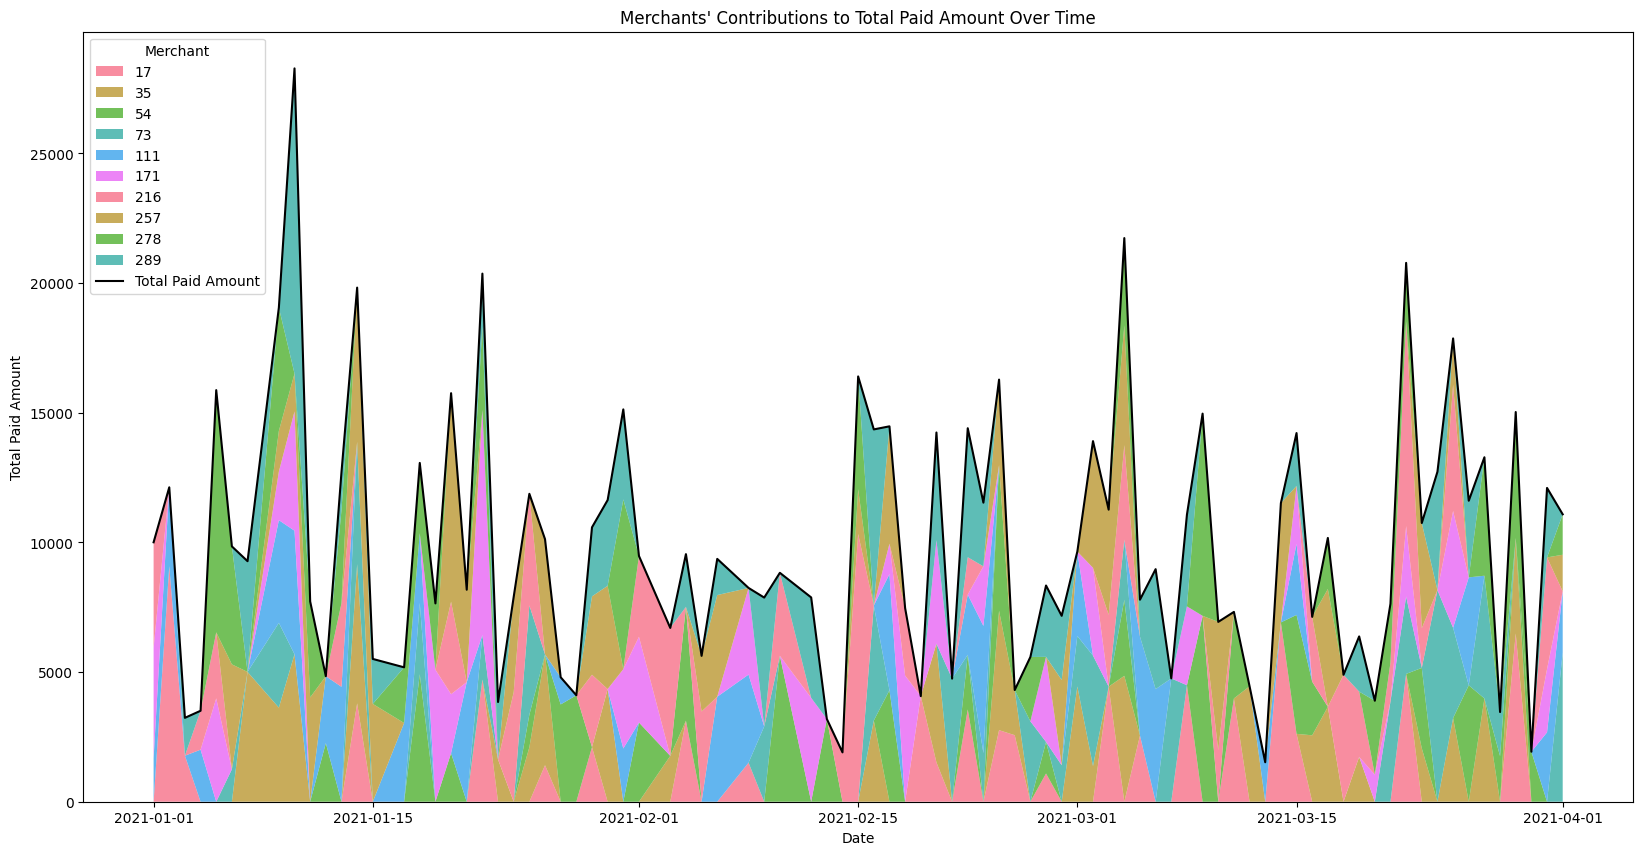

In [123]:
pivot_table = merchant_contributions.pivot(index='datecl', columns='mid', values='paid_amount').fillna(0) #PIVOT TABLE FOR PLOTTING

# PLOTTING
plt.figure(figsize=(20, 10))
plt.stackplot(pivot_table.index, pivot_table.values.T, labels=pivot_table.columns, alpha=0.8)

total_paid_amount = pivot_table.sum(axis=1)
plt.plot(total_paid_amount.index, total_paid_amount, color='black', linestyle='-', label='Total Paid Amount')


plt.title('Merchants\' Contributions to Total Paid Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Paid Amount')
plt.legend(title='Merchant', loc='upper left')
plt.show()

- Among the top 10 merchants in terms of paid amount, there is noticeable diversity in their daily traffic patterns. Each merchant appears to have a unique trajectory, contributing to the overall variance in performance.
  
- Fluctuations in daily traffic across the top merchants may be influenced by seasonal trends, promotional events, or external factors. Analyzing these variations can provide insights into the impact of external events on merchant performance.

- While individual merchants exhibit varying patterns, identifying periods of consistent high traffic among the top 10 merchants is crucial. These high-performing periods could be associated with successful promotions, marketing campaigns, or product launches.
  
- The observed differences in traffic patterns suggest that a one-size-fits-all approach may not be suitable for the top 10 merchants. Tailoring marketing and promotional strategies based on each merchant's historical performance could optimize results.

In [ ]:
#QUESTION 3: Which payment methods were being used (visualize their popularity in terms of the number of clicks generated)?

In [125]:
payment_methods = df['payment_method'].unique() #GET PAYMENT METHODS
print(f"The payment methods being used are {payment_methods}")

The payment methods being used are ['Mobile' 'Bank transfers' 'E-Wallet' 'Credit cards' 'Prepaid cards']


In [132]:
clicks_by_methods = df.groupby('payment_method').agg({'cl_id' : 'nunique'}).reset_index() #GROUP CLICKS BY PAYMENT METHODS
clicks_by_methods

,payment_method,cl_id
0,Bank transfers,1990
1,Credit cards,2033
2,E-Wallet,1944
3,Mobile,2037
4,Prepaid cards,1996


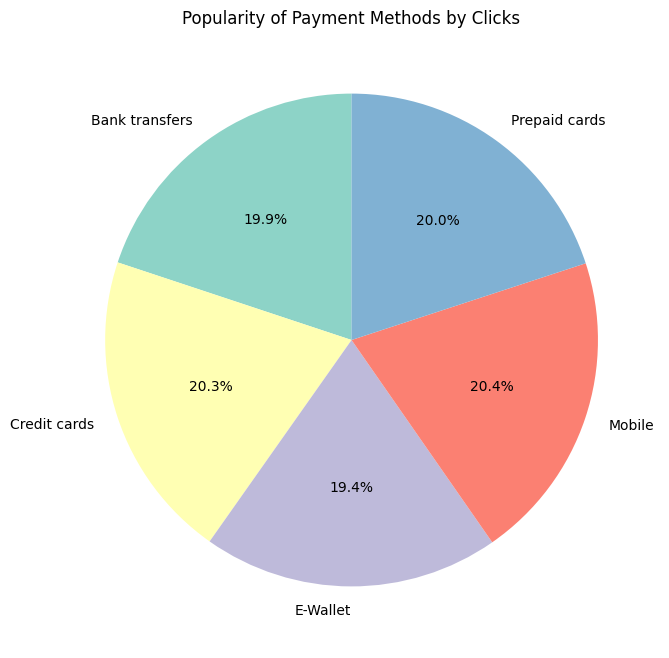

In [134]:
#PLOTTING
plt.figure(figsize=(8, 8))
plt.pie(clicks_by_methods['cl_id'], labels=clicks_by_methods['payment_method'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Popularity of Payment Methods by Clicks')
plt.show()

- The analysis of clicks by payment methods reveals a remarkably balanced distribution, with each method contributing approximately 20% to the total number of clicks.
  
- All payment methods, including Mobile, Bank transfers, E-Wallet, Credit cards, and Prepaid cards, exhibit an equal level of popularity, with no significant variations in click counts.
  
- The fact that users engage with different payment methods equally may indicate a lack of strong user preference for a particular method, showcasing a well-distributed user base.
  
- Given the equal popularity of payment methods, there may be an opportunity to promote specific methods or incentivize users to explore alternative payment options.

In [ ]:
#QUESTION 4: Which countries did we process? What were the traffic and volume (total paid amount and number of clicks) for each country? List top 10 countries with the highest average paid amount per successful payment.

In [138]:
countries = df['co_name'].unique() #GET COUNTRIES NAMES
print(f"The countries being processed are {countries}")

The countries being processed are ['Canada' 'Germany' 'United States' 'Iran' 'Finland' 'Turkey'
 'Netherlands' 'Brazil' 'Switzerland' 'New Zealand' 'Australia' 'Norway'
 'United Kingdom' 'Ireland' 'France' 'Spain' 'Denmark']


In [140]:
#GROUP PAID AMOUNT BY COUNTRY
paid_amount_by_country = successful_df.groupby('co_name').agg({'paid_amount': 'sum'}).sort_values(by='paid_amount', ascending=False).reset_index()
paid_amount_by_country

,co_name,paid_amount
0,Norway,1010047.00
1,Denmark,986855.08
2,Australia,939779.36
3,Netherlands,926107.64
4,Iran,908760.56
5,United Kingdom,907950.36
6,Germany,907744.20
7,Switzerland,906108.56
8,Finland,898478.68
9,Turkey,894412.64


In [141]:
#GROUP CLICKS BY COUNTRY
clicks_by_country = df.groupby('co_name').agg({'cl_id': 'nunique'}).sort_values(by='cl_id', ascending=False).reset_index()
clicks_by_country

,co_name,cl_id
0,Germany,637
1,Netherlands,620
2,Denmark,613
3,Norway,610
4,Australia,608
5,Iran,602
6,Spain,586
7,Switzerland,586
8,New Zealand,581
9,United Kingdom,580


In [159]:
#GET TOP 10 COUNTRIES BY AVERAGE PAID AMOUNT 
average_paid_amount = successful_df.groupby('co_name').agg({'paid_amount' : 'mean'})
average_paid_amount['paid_amount'] = average_paid_amount['paid_amount'].round(2)
top_10_average_paid_amount = average_paid_amount.sort_values(by='paid_amount', ascending=False).head(10).reset_index()
top_10_average_paid_amount

,co_name,paid_amount
0,United Kingdom,3174.65
1,Norway,3166.29
2,Iran,3091.02
3,Ireland,3070.16
4,Turkey,3063.06
5,Denmark,3045.85
6,Spain,3006.58
7,Australia,3002.49
8,Germany,2995.86
9,Finland,2994.93


In [ ]:
#QUESTION 5: What was the volume (total paid amount) of the card brand and payment method? Visualize with Tree Map to show the proportion between payment method and card brand (please visualize in 1 map).

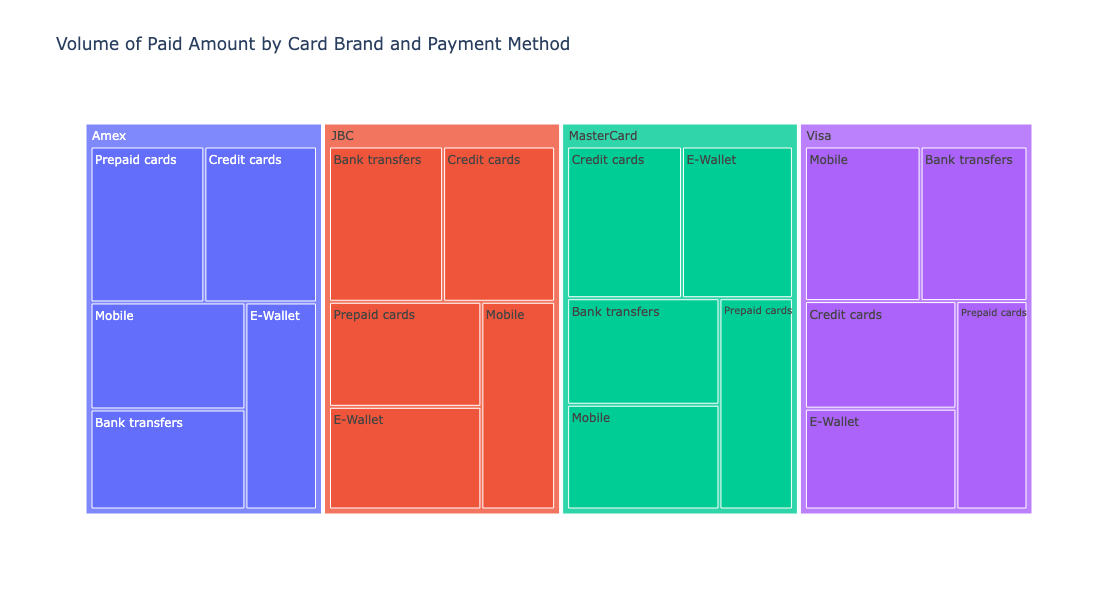

In [209]:
#GROUP PAID AMOUNT BY BRAND AND PAYMENT METHOD
volume_by_brand_method = successful_df.groupby(['card_brand', 'payment_method'])['paid_amount'].sum().reset_index()

#PLOTTING
fig = px.treemap(data_frame = volume_by_brand_method, 
                 path=['card_brand', 'payment_method'], 
                 values='paid_amount',
                 title='Volume of Paid Amount by Card Brand and Payment Method',
                )

fig.update_layout(
    width=1200,
    height=600, 
)

fig.show()

- The chart helps identify the preferred payment methods for each card brand. A payment method that is popular for one brand may not be as prevalent for another. Understanding these preferences can inform marketing and partnership strategies.

- The varying distribution of payment methods across card brands indicates potential market segments with distinct payment preferences. Consider tailoring marketing campaigns or promotions based on these segments to maximize engagement

- For brands where a particular payment method is dominant, consider exploring strategic partnerships or collaborations with providers of that payment method to enhance the user experience and potentially attract more customers.

- Assess the competitive landscape by understanding how each card brand positions itself in terms of payment methods. Brands that offer a diverse set of payment options may appeal to a broader audience.